In [1]:
#Notebook to make Figure 2 of the draft GRL paper. 
#Combines stuff that was originally done in GregoryTRACMIP.ipynb and 
#AnalyzeGregoryFeedbacks.ipynb, into one paper.

#Rick Russotto
#Started 11-18-19
#12-11-19: adding instantaneous CO2 forcing

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from voigtColors import voigtColors

In [3]:
#Model lists
models_12 = ['AM2', 'CAM3', 'CAM4', 'CNRM-AM6-DIA-v2', 'ECHAM-6.1',
             'ECHAM-6.3', 'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL',
             'MetUM-GA6-ENT', 'NorESM2']

legend_12 = ['AM2', 'CAM3', 'CAM4', 'CNRM-AM6-DIA-v2', 'ECHAM-6.1',
             'ECHAM-6.3', 'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL',
             'MetUM-GA6-ENT', 'NorESM2', 'Multi-model mean']

#For LW cloud stuff
models_10 = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1',
             'ECHAM-6.3', 'IPSL-CM5A', 'MIROC5', 
             'MPAS', 'MetUM-GA6-CTL', 'MetUM-GA6-ENT']

#For LW water vapor, all models except CNRM which had zero water vapor at certain heights
models_noCNRM = ['AM2', 'CAM3', 'CAM4', 'ECHAM-6.1',
             'ECHAM-6.3', 'IPSL-CM5A', 'MIROC5', 'MPAS', 'MetUM-GA6-CTL',
             'MetUM-GA6-ENT', 'NorESM2']

#(means for other variables missing models are OK because it's at all latitudes, not just some)

In [4]:
#Load the effective forcing and net feedback
ds_total = xr.open_dataset('nc_from_xarray/GregoryTotalForcingFeedbackStorage_a4.nc')

In [5]:
#Load the APRP Gregory results
ds_APRP = xr.open_dataset('nc_from_xarray/GregoryAPRP_a4.nc')

In [6]:
#Load the LW radiative kernel results
ds_kernel_ta = xr.open_dataset('nc_from_xarray/Gregory_kernel_ta_a4.nc')
ds_kernel_wv = xr.open_dataset('nc_from_xarray/Gregory_kernel_wv_a4.nc')
ds_kernel_ts = xr.open_dataset('nc_from_xarray/Gregory_kernel_ts_a4.nc')

In [7]:
#Load the LW cloud results
ds_dLWCRE_raw = xr.open_dataset('nc_from_xarray/Gregory_dLWCRE_raw_a4.nc')
ds_dLWCRE_co = xr.open_dataset('nc_from_xarray/Gregory_dLWCRE_co_a4.nc')

In [8]:
#Caclculate the instantaneous radiative forcing by subtracting all the rapid adjustments
#from the effective forcing
f_inst = ds_total['forcing'] - (ds_APRP['adj_cloud'] + ds_APRP['adj_noncloud']
                                + ds_dLWCRE_co['adj'] - ds_kernel_wv['adj'] - ds_kernel_ta['adj'])

In [9]:
print(f_inst)
#print(f_inst.isel(lat=20)) #OK, the subtraction gets rid of the extra models, matching up on dimensions. 
#print(ds_total['forcing'].isel(lat=20))

<xarray.DataArray (model: 10, lat: 180)>
array([[       nan, 5.03241382, 4.85064322, ..., 4.67556359, 4.71527167,
               nan],
       [       nan,        nan, 4.74960435, ..., 5.02722166,        nan,
               nan],
       [       nan, 4.49380382, 4.42032325, ..., 4.60478645, 4.83498714,
               nan],
       ...,
       [       nan, 4.60949455, 4.50098523, ..., 4.65471611, 4.87067122,
               nan],
       [       nan, 4.86895509, 4.87558395, ..., 4.26053696, 4.266573  ,
               nan],
       [       nan, 4.73263445, 4.75946461, ..., 4.6183877 , 4.60241567,
               nan]])
Coordinates:
  * model    (model) object 'AM2' 'CAM3' ... 'MetUM-GA6-CTL' 'MetUM-GA6-ENT'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5


In [10]:
#Colors for the individual forcings/feedbacks, from the results scatter plot
colorsEachExp = {'all': 'k', 
                 'no_adj_sw_cloud': 'cornflowerblue', 
                 'no_adj_sw_noncloud': 'turquoise', #water vapor
                 'no_adj_lw_cloud': 'darkblue',
                 'no_adj_lw_wv': 'green',
                 'no_adj_lw_ta': 'red',
                 'no_fb_sw_cloud': 'cornflowerblue',
                 'no_fb_sw_noncloud': 'turquoise',  #water vapor
                 'no_fb_lw_cloud': 'darkblue',
                 'no_fb_lw_wv': 'green',
                 'no_fb_lw_ts': 'coral',
                 'no_fb_lw_ta_05p': [0.4, 0, 0], 
                 'no_fb_lw_ta_10p': [0.6, 0.2, 0.2], 
                 'no_fb_lw_ta_15p': [0.8, 0.4, 0.4]}

In [11]:
#Legend text for the rapid adjustments and feedbacks
legend_adjustments = ['Inst. CO$_2$ forcing', 'SW cloud', 'SW water vapor', 'LW cloud', 'LW water vapor', 'LW atmos. temperature']

In [12]:
#Calculate multi-model means and measure of spread (2nd-most-extreme model?)
#Make sure missing model for water vapor isn't included (&c. for other effects)

/usr/local/python/anaconda3/envs/pangeo-latest/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/usr/local/python/anaconda3/envs/pangeo-latest/lib/python3.7/site-packages/xarray/core/nputils.py:223: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


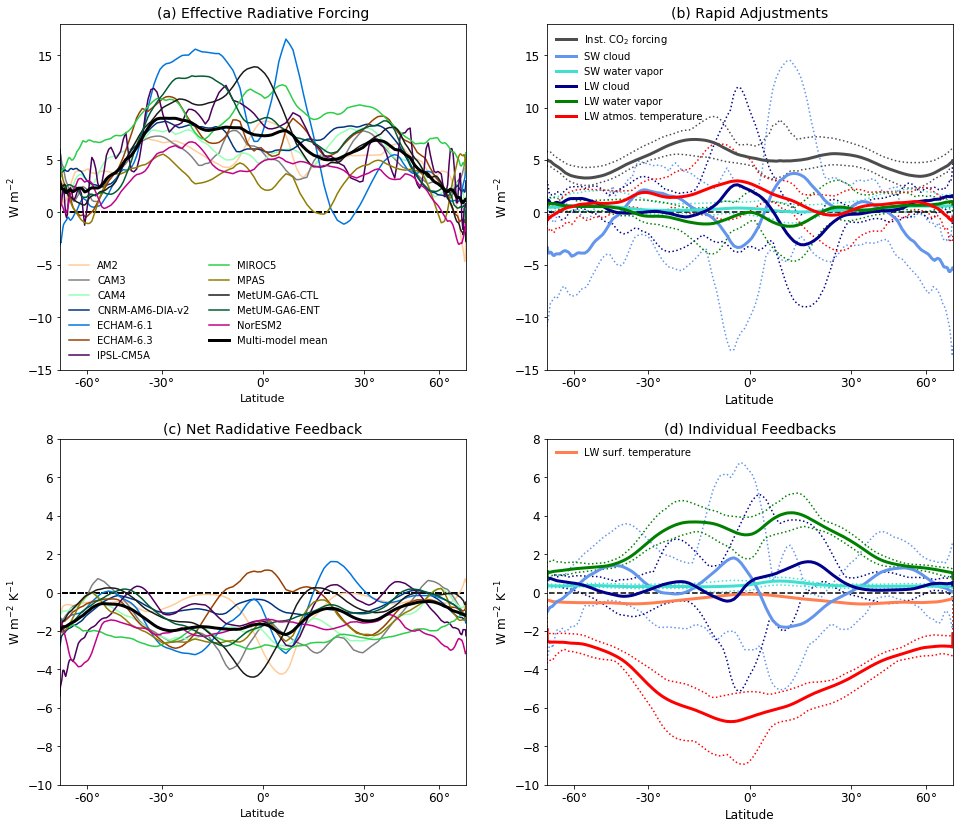

In [13]:
#Make the figure
plt.figure(figsize=(16,14))

#Effective Forcing
ax = plt.subplot(2,2,1)
for model in models_12:
    plt.plot(np.sin(ds_total.lat*np.pi/180.), ds_total['forcing'].sel(model=model), color=voigtColors[model])
    plt.hlines(0, -.99, .99, linestyles='dashed')
plt.plot(np.sin(ds_total.lat*np.pi/180.), ds_total['forcing'].mean(dim='model'), 'k', linewidth=3)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('W m$^{-2}$', fontsize=12)
ax.set_xticks([-.866, -.5, 0, .5, .866])
ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
ax.tick_params(labelsize=12)
plt.xlabel('Latitude', fontsize=11)
plt.title('(a) Effective Radiative Forcing', fontsize=14)
ax.legend(legend_12, loc = 'lower left', frameon=False, ncol=2)
plt.axis([-1, 1, -15, 18])

#Net Feedback
ax = plt.subplot(2,2,3)
for model in models_12:
    plt.plot(np.sin(ds_total.lat*np.pi/180.), ds_total['feedback'].sel(model=model), color=voigtColors[model])
    plt.hlines(0, -.99, .99, linestyles='dashed')
plt.plot(np.sin(ds_total.lat*np.pi/180.), ds_total['feedback'].mean(dim='model'), 'k', linewidth=3)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('W m$^{-2}$ K$^{-1}$', fontsize=12)
ax.set_xticks([-.866, -.5, 0, .5, .866])
ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
ax.tick_params(labelsize=12)
plt.xlabel('Latitude', fontsize=11)
plt.title('(c) Net Radidative Feedback', fontsize=14)
plt.axis([-1, 1, -10, 8])

#Individual Rapid Adjustments and feedbacks
lat = ds_total.lat
sinlat = np.sin(lat*np.pi/180.)

#Individual Rapid Adjustments
#Set up panel
ax = plt.subplot(2,2,2)
plt.hlines(0, -.99, .99, linestyles='dashed')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('W m$^{-2}$', fontsize=12)
ax.set_xticks([-.866, -.5, 0, .5, .866])
ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
ax.tick_params(labelsize=12)
plt.title('(b) Rapid Adjustments', fontsize=14)
#Means
plt.plot(sinlat, f_inst.mean(dim='model'), color=[0.3, 0.3, 0.3], linewidth=3)
plt.plot(sinlat, ds_APRP['adj_cloud'].mean(dim='model'), 'cornflowerblue', linewidth=3)
plt.plot(sinlat, ds_APRP['adj_noncloud'].mean(dim='model'), 'turquoise', linewidth=3)
plt.plot(sinlat, ds_dLWCRE_co['adj'].mean(dim='model'), 'darkblue', linewidth=3)
plt.plot(sinlat, -ds_kernel_wv['adj'].sel(model=models_noCNRM).mean(dim='model'), 'green', linewidth=3)
plt.plot(sinlat, -ds_kernel_ta['adj'].mean(dim='model'), 'red', linewidth=3)
#Spreads (just max, min to start)
plt.plot(sinlat, f_inst.max(dim='model'), color=[0.3, 0.3, 0.3], linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['adj_cloud'].max(dim='model'), 'cornflowerblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['adj_noncloud'].max(dim='model'), 'turquoise', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_dLWCRE_co['adj'].max(dim='model'), 'darkblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_wv['adj']).sel(model=models_noCNRM).max(dim='model'), 'green', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_ta['adj']).max(dim='model'), 'red', linewidth=1.5, linestyle='dotted', zorder=-1)
#min
plt.plot(sinlat, f_inst.min(dim='model'), color=[0.3, 0.3, 0.3], linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['adj_cloud'].min(dim='model'), 'cornflowerblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['adj_noncloud'].min(dim='model'), 'turquoise', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_dLWCRE_co['adj'].min(dim='model'), 'darkblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_wv['adj']).sel(model=models_noCNRM).min(dim='model'), 'green', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_ta['adj']).min(dim='model'), 'red', linewidth=1.5, linestyle='dotted', zorder=-1)
#finish panel stuff
ax.legend(legend_adjustments, loc = 'upper left', frameon=False)
plt.axis([-1, 1, -15, 18])


#Individual Feedbacks
#Set up panel
ax = plt.subplot(2,2,4)
plt.hlines(0, -.99, .99, linestyles='dashed')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('W m$^{-2}$ K$^{-1}$', fontsize=12)
ax.set_xticks([-.866, -.5, 0, .5, .866])
ax.xaxis.set_ticklabels(['-60$\degree$', '-30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$'])
ax.tick_params(labelsize=12)
plt.title('(d) Individual Feedbacks', fontsize=14)
#Means
plt.plot(sinlat, -ds_kernel_ts['fb'].mean(dim='model'), 'coral', linewidth=3)
plt.plot(sinlat, ds_APRP['fb_cloud'].mean(dim='model'), 'cornflowerblue', linewidth=3)
plt.plot(sinlat, ds_APRP['fb_noncloud'].mean(dim='model'), 'turquoise', linewidth=3)
plt.plot(sinlat, ds_dLWCRE_co['fb'].mean(dim='model'), 'darkblue', linewidth=3)
plt.plot(sinlat, -ds_kernel_wv['fb'].sel(model=models_noCNRM).mean(dim='model'), 'green', linewidth=3)
plt.plot(sinlat, -ds_kernel_ta['fb'].mean(dim='model'), 'red', linewidth=3)
#Spreads (just max, min to start--note the surface temperature kernel has no inter-model spread)
plt.plot(sinlat, ds_APRP['fb_cloud'].max(dim='model'), 'cornflowerblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['fb_noncloud'].max(dim='model'), 'turquoise', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_dLWCRE_co['fb'].max(dim='model'), 'darkblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_wv['fb']).sel(model=models_noCNRM).max(dim='model'), 'green', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_ta['fb']).max(dim='model'), 'red', linewidth=1.5, linestyle='dotted', zorder=-1)
#min
plt.plot(sinlat, ds_APRP['fb_cloud'].min(dim='model'), 'cornflowerblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_APRP['fb_noncloud'].min(dim='model'), 'turquoise', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, ds_dLWCRE_co['fb'].min(dim='model'), 'darkblue', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_wv['fb']).sel(model=models_noCNRM).min(dim='model'), 'green', linewidth=1.5, linestyle='dotted', zorder=-1)
plt.plot(sinlat, (-ds_kernel_ta['fb']).min(dim='model'), 'red', linewidth=1.5, linestyle='dotted', zorder=-1)
#finish panel stuff--legend for just the new one (surface temperature)
ax.legend(['LW surf. temperature'], loc = 'upper left', frameon=False)
plt.axis([-1, 1, -10, 8])


plt.savefig('plots/Figure2.png')
plt.savefig('plots/Figure2.pdf')


